In [1]:
%load_ext load_style
%load_style talk.css

# Read SST and Visualize in different projections

This notebook only shows how to visualize SST dta in several projections.

About masking land, two methods are illustrated:
* use to mask array to multiply sst data
* set SST's maskarray using its own nan values

In fact, we can set SST's maskarray using the land-ocean mask array. It is showed in the following notebooks.

## 1. Load basic libraries

In [2]:
%matplotlib inline
import numpy as np
     
from netCDF4 import Dataset # http://unidata.github.io/netcdf4-python/

import matplotlib.pyplot as plt         # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## 2. Read skt and mask data

### 2.1 read skt

In [3]:
ncfile = 'data\skt.mon.mean.nc'

fh  = Dataset(ncfile, mode='r') # file handle, open in read only mode
skt = fh.variables['skt'][:]
lon    = fh.variables['lon'][:]
lat    = fh.variables['lat'][:]
fh.close()

skt.shape

(687L, 94L, 192L)

### 2.2  read mask and make ocean="1"

In [4]:
lmfile = 'data\lsmask.19294.nc'
lmset  = Dataset(lmfile)
lsmask = lmset['lsmask'][0]

lsm = lsmask + 1
lsm[lsm<1.0] = np.nan

## 3. Calculate yearly SST climatology in the first year (1948)

In [5]:
skt_y1 = np.mean(skt[0:12,:,:], axis=0)

# masking over ocean
sst_y1 = skt_y1*lsm

## 4. Have a dirty look without projections

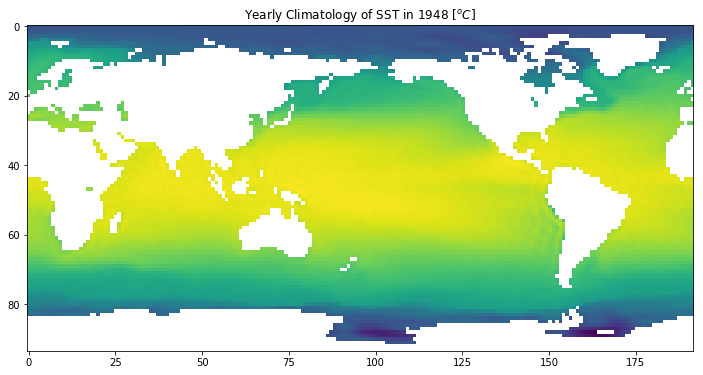

In [6]:
plt.imshow(sst_y1)                       
plt.title('Yearly Climatology of SST in 1948 [$^oC$]')

## 5. Visualize with projections

The matplotlib basemap is used here, which is a library for plotting 2D data on maps in Python. It is similar in functionality to the matlab mapping toolbox, the IDL mapping facilities, GrADS, or the Generic Mapping Tools. PyNGL and CDAT are other libraries that provide similar capabilities in Python (https://matplotlib.org/basemap/users/intro.html).

basemap supports many projecitons:
* Azimuthal Equidistant Projection
* Gnomonic Projection
* Orthographic Projection
* Geostationary Projection
* Near-Sided Perspective Projection
* Mollweide Projection
* ...

### 5.1 Have to make a mask array for sst_y1 before drawing maps

In [7]:
masked_sst_y1 = np.ma.array (sst_y1, mask=np.isnan(sst_y1))
masked_sst_y1

lons, lats = np.meshgrid(lon,lat)

### 5.2 Equidistant Cylindrical Projection

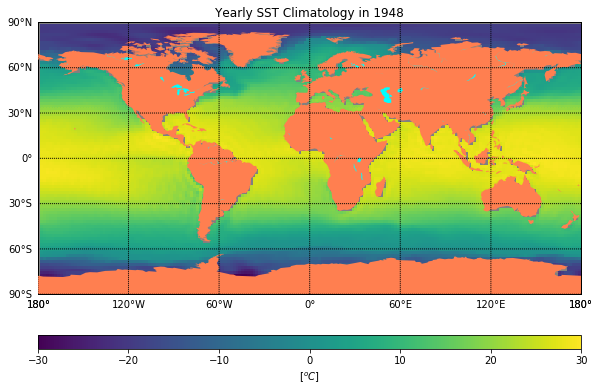

In [8]:
m = Basemap(projection='cyl', lon_0=0)
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='Gray', zorder=0)
m.drawparallels(np.arange(-90.,99.,30.), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.), labels=[0,0,0,1])

h = m.pcolormesh(lons, lats, masked_sst_y1, shading='flat',latlon=True, vmin=-30.0, vmax=30.0)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')

plt.title('Yearly SST Climatology in 1948')

### 5.3 Robinson Projection

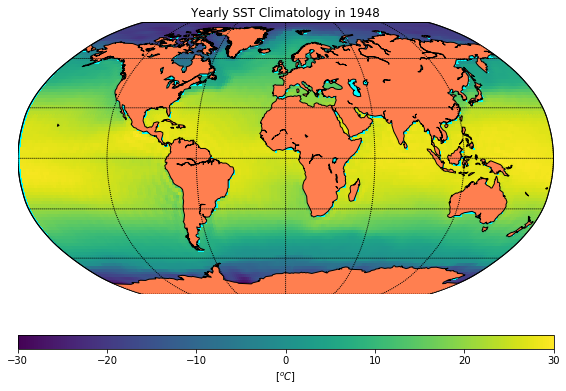

In [9]:
m = Basemap(projection='robin', lon_0=0)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')

h = m.pcolormesh(lons, lats, masked_sst_y1, shading='flat',latlon=True, vmin=-30.0, vmax=30.0)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')

plt.title('Yearly SST Climatology in 1948')

### 5.4 Full Disk Orthographic Projection

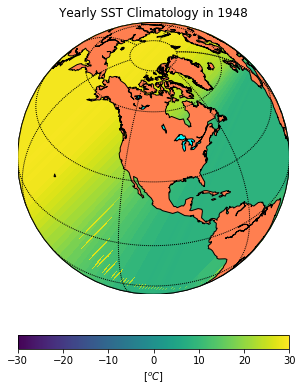

In [10]:
m = Basemap(projection='ortho',lon_0=-105,lat_0=40l)
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')


h = m.pcolormesh(lons, lats, masked_sst_y1, shading='flat',latlon=True, vmin=-30.0, vmax=30.0)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')

plt.title('Yearly SST Climatology in 1948')

### 5.5 Hammer Projection

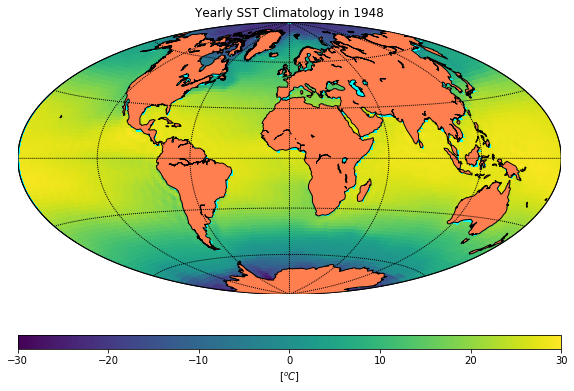

In [11]:
m = Basemap(projection='hammer', lon_0=0l)

m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')

h = m.pcolormesh(lons, lats, masked_sst_y1, shading='flat',latlon=True, vmin=-30.0, vmax=30.0)
m.colorbar(h, location='bottom', pad="15%", label='[$^oC$]')

plt.title('Yearly SST Climatology in 1948')

## References

http://unidata.github.io/netcdf4-python/

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Kalnay et al.,The NCEP/NCAR 40-year reanalysis project, Bull. Amer. Meteor. Soc., 77, 437-470, 1996.